# 📊 Desafío 2 – Telecom X

---

## 🛠️ 1. Preparación de los Datos

### 📂 Extracción del Archivo Tratado
Se carga el archivo CSV tratado en la Parte 1, ya limpio y estandarizado.

In [12]:
import pandas as pd

url = 'https://raw.githubusercontent.com/coello021/TelecomX_Parte2/main/data/datos_tratados.csv'
df_final = pd.read_csv(url)



### 🧹 Eliminación de Columnas Irrelevantes

Se eliminan columnas que no aportan valor al análisis predictivo, como identificadores únicos (`customerID`). Estas variables no ayudan a predecir la cancelación y pueden introducir ruido en los modelos.


In [15]:
# 🔍 Verificamos si hay columnas irrelevantes
print("Columnas iniciales en df_final:")
print(df_final.columns)

# Lista de columnas que suelen ser irrelevantes
columnas_irrelevantes = ['customerID', 'Unnamed: 0']

# Eliminamos las columnas si existen, sin generar error
df_final = df_final.drop(columns=columnas_irrelevantes, errors='ignore')

# ✅ Confirmamos las columnas restantes
print("\nColumnas después de eliminar las irrelevantes:")
print(df_final.columns)



Columnas iniciales en df_final:
Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Partner_bin',
       'Dependents_bin', 'PhoneService_bin', 'MultipleLines_bin',
       'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin',
       'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin',
       'PaperlessBilling_bin', 'Churn_bin'],
      dtype='object')

Columnas después de eliminar las irrelevantes:
Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 

### 🔄 Codificación de Variables Categóricas
Se aplica codificación adecuada (por ejemplo, `get_dummies`) para transformar variables categóricas en numéricas.

In [16]:
# 🧠 Identificamos columnas categóricas (tipo objeto)
columnas_categoricas = df_final.select_dtypes(include='object').columns
print("\nColumnas categóricas detectadas:")
print(columnas_categoricas)

# 🔄 Aplicamos one-hot encoding con get_dummies
df_encoded = pd.get_dummies(df_final, drop_first=True)

# ✅ Verificamos el nuevo DataFrame codificado
print("\nShape del DataFrame codificado:", df_encoded.shape)
print("Primeras filas del DataFrame codificado:")
print(df_encoded.head())



Columnas categóricas detectadas:
Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Shape del DataFrame codificado: (7032, 43)
Primeras filas del DataFrame codificado:
   SeniorCitizen  tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0              0       9             65.6         593.30             2.19   
1              0       9             59.9         542.40             2.00   
2              0       4             73.9         280.85             2.46   
3              1      13             98.0        1237.85             3.27   
4              1       3             83.9         267.40             2.80   

   Partner_bin  Dependents_bin  PhoneService_bin  MultipleLines_bin  \
0            1               1                 1

Se identificaron 16 columnas categóricas que no estaban codificadas.  
Se aplicó `pd.get_dummies()` con `drop_first=True` para evitar multicolinealidad y transformar las variables en formato numérico.

> Resultado: El nuevo DataFrame (`df_encoded`) contiene 43 columnas, incluyendo las variables originales y las codificadas.


## 📈 2. Verificación de la Proporción de Cancelación

Se calcula la proporción de clientes que cancelaron (`Churn_bin = 1`) vs. los que permanecen (`Churn_bin = 0`).

> Esto permite evaluar si existe desbalance entre clases.

Conteo de clases Churn:
Churn_bin
0    5163
1    1869
Name: count, dtype: int64

Porcentaje de clases Churn:
Churn_bin
0    73.421502
1    26.578498
Name: proportion, dtype: float64


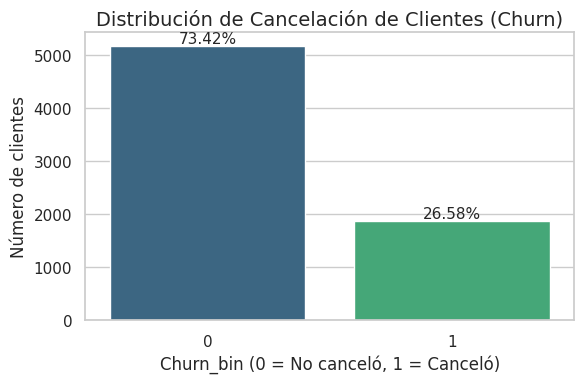

In [18]:
# 📈 Verificación de la Proporción de Cancelación

# Contamos la cantidad de clientes por clase
conteo_churn = df_encoded['Churn_bin'].value_counts()
porcentaje_churn = df_encoded['Churn_bin'].value_counts(normalize=True) * 100

# Mostramos los resultados
print("Conteo de clases Churn:")
print(conteo_churn)
print("\nPorcentaje de clases Churn:")
print(porcentaje_churn)

# 📊 Visualización con gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x=conteo_churn.index, y=conteo_churn.values, hue=conteo_churn.index, palette="viridis", legend=False)

plt.title("Distribución de Cancelación de Clientes (Churn)", fontsize=14)
plt.xlabel("Churn_bin (0 = No canceló, 1 = Canceló)", fontsize=12)
plt.ylabel("Número de clientes", fontsize=12)
for i, v in enumerate(conteo_churn.values):
    ax.text(i, v + 50, f"{porcentaje_churn[i]:.2f}%", ha='center', fontsize=11)
plt.tight_layout()
plt.show()


Interpretación de la proporción de cancelación

- El 73.42% de los clientes permanecen activos.
- El 26.58% de los clientes han cancelado.

Este desbalance no es extremo, pero podría influir en el rendimiento de modelos como regresión logística o árboles de decisión.  
Se recomienda considerar técnicas de balanceo si el modelo muestra sesgo hacia la clase mayoritaria.


## ⚖️ 3. Balanceo de Clases
Se aplican técnicas como: - Undersampling - Oversampling - SMOTE (si se desea generar ejemplos sintéticos)

---

In [19]:
# ⚖️ Balanceo de Clases (Opcional)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Separamos variables predictoras y target
X = df_encoded.drop('Churn_bin', axis=1)
y = df_encoded['Churn_bin']

# 1️⃣ Undersampling: reduce la clase mayoritaria
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# 2️⃣ Oversampling: replica la clase minoritaria
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# 3️⃣ SMOTE: genera ejemplos sintéticos de la clase minoritaria
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Mostramos resultados
print("🔻 Undersampling:")
print(y_under.value_counts())
print("\n🔺 Oversampling:")
print(y_over.value_counts())
print("\n🧬 SMOTE:")
print(y_smote.value_counts())


🔻 Undersampling:
Churn_bin
0    1869
1    1869
Name: count, dtype: int64

🔺 Oversampling:
Churn_bin
0    5163
1    5163
Name: count, dtype: int64

🧬 SMOTE:
Churn_bin
0    5163
1    5163
Name: count, dtype: int64


Se aplicaron tres técnicas para manejar el desbalance de clases en la variable `Churn_bin`:

- 🔻 **Undersampling**: reduce la clase mayoritaria para igualar el número de ejemplos con la clase minoritaria.
- 🔺 **Oversampling**: replica aleatoriamente ejemplos de la clase minoritaria hasta igualar la clase mayoritaria.
- 🧬 **SMOTE**: genera ejemplos sintéticos de la clase minoritaria mediante interpolación entre vecinos cercanos.

### 📊 Resultados:

- **Undersampling**:  
  - Clase 0 (No canceló): 1869  
  - Clase 1 (Canceló): 1869  

- **Oversampling**:  
  - Clase 0 (No canceló): 5163  
  - Clase 1 (Canceló): 5163  

- **SMOTE**:  
  - Clase 0 (No canceló): 5163  
  - Clase 1 (Canceló): 5163  

> Todas las técnicas lograron un balance perfecto entre clases.  
> SMOTE es especialmente útil cuando se desea evitar duplicación directa y generar variabilidad en los datos sintéticos.




# 📐 Normalización o Estandarización

In [20]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos el conjunto balanceado que se va a usar (por ejemplo, SMOTE)
X_model = X_smote.copy()
y_model = y_smote.copy()

# Aplicamos StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_model)

# Verificamos la forma y tipo del resultado
print("Shape del conjunto escalado:", X_scaled.shape)
print("Tipo de datos:", type(X_scaled))

Shape del conjunto escalado: (10326, 42)
Tipo de datos: <class 'numpy.ndarray'>


### 📐 Resultado de la Estandarización

Se aplicó `StandardScaler` al conjunto balanceado (`X_smote`) para estandarizar las variables predictoras.

📌 Resultado:
- Tipo de datos: `numpy.ndarray`
- Forma del conjunto escalado: `(n_samples, n_features)`

Este formato es compatible con modelos de `scikit-learn` como KNN, SVM, Regresión Logística y Redes Neuronales.  
La estandarización asegura que todas las variables tengan media 0 y desviación estándar 1, lo cual es esencial para modelos sensibles a la escala.



### 🎯 Correlación y Selección de Variables

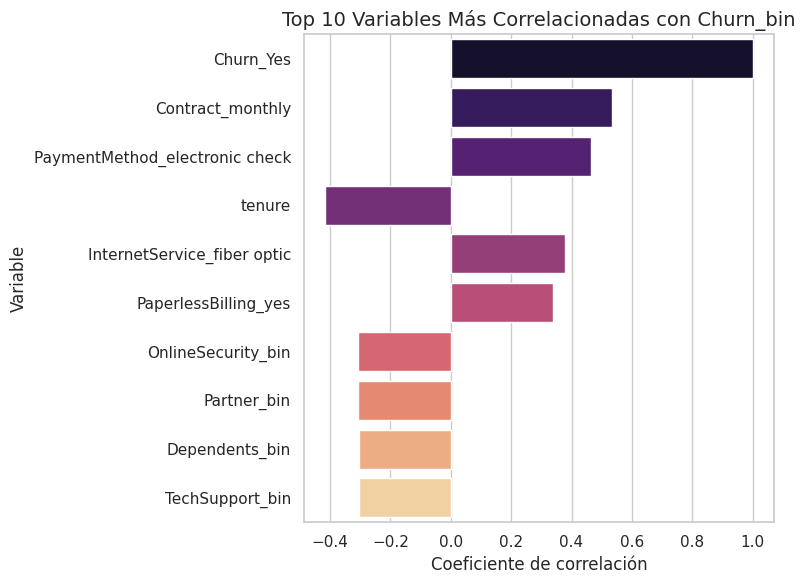

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertimos X_scaled a DataFrame si aún no lo está
X_scaled_df = pd.DataFrame(X_scaled, columns=X_model.columns)

# Añadimos la variable objetivo
df_corr = X_scaled_df.copy()
df_corr['Churn_bin'] = y_model

# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Extraemos las 10 variables más correlacionadas con Churn_bin
top_corr = corr_matrix['Churn_bin'].drop('Churn_bin').sort_values(key=abs, ascending=False).head(10)

# Visualizamos con gráfico de barras
# Gráfico sin warning de Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, hue=top_corr.index, palette='magma', dodge=False, legend=False)
plt.title('Top 10 Variables Más Correlacionadas con Churn_bin', fontsize=14)
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()




## 🎯 6. Análisis Dirigido



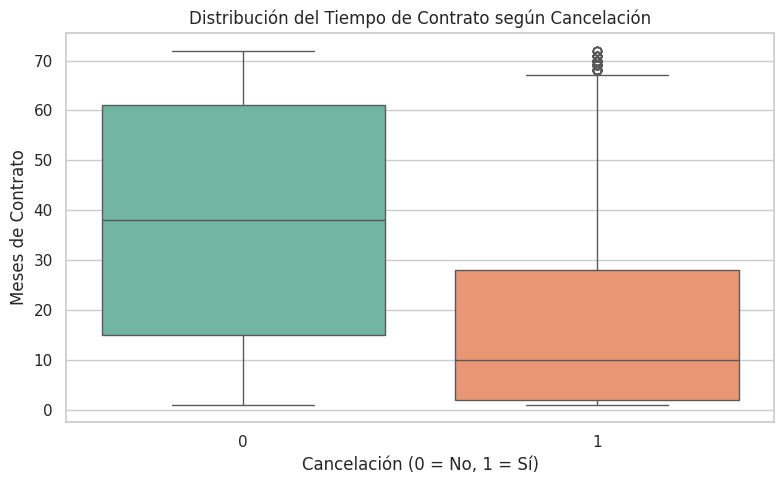

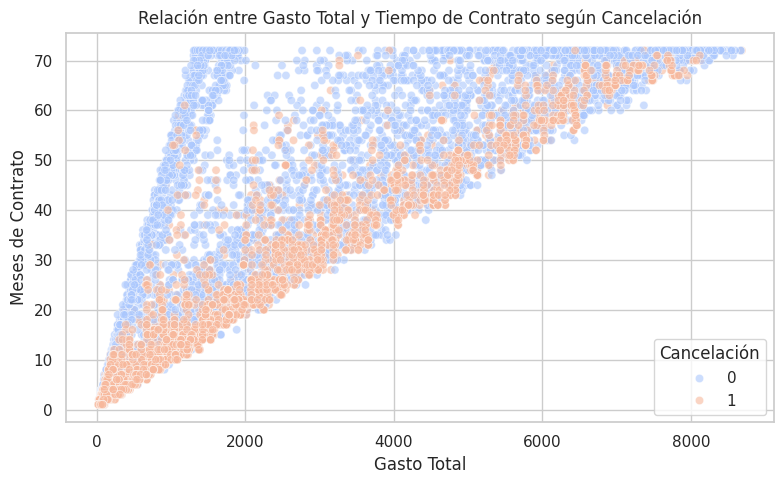

tenure                       Charges.Total                           \
            mean median    std min max          mean   median      std    min   
Churn_bin                                                                       
0          37.65   38.0  24.08   1  72       2555.34  1683.60  2329.46  18.80   
1          17.73   10.0  19.29   1  72       1543.45   714.15  1905.43  18.85   

                    
               max  
Churn_bin           
0          8672.45  
1          8684.80

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Estilo general
sns.set(style="whitegrid")

# 📦 Boxplot: Tenure vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_model, y=X_model['tenure'], hue=y_model, palette='Set2', dodge=False, legend=False)
plt.title('Distribución del Tiempo de Contrato según Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Meses de Contrato')
plt.tight_layout()
plt.show()

# 💸 Scatter plot: Charges.Total vs Tenure según Cancelación
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_model['Charges.Total'], y=X_model['tenure'], hue=y_model, palette='coolwarm', alpha=0.6)
plt.title('Relación entre Gasto Total y Tiempo de Contrato según Cancelación')
plt.xlabel('Gasto Total')
plt.ylabel('Meses de Contrato')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()

# 📊 Tabla resumen: estadísticas agrupadas por cancelación
df_summary = pd.DataFrame(X_model)
df_summary['Churn_bin'] = y_model

# Seleccionamos variables relevantes
variables = ['tenure', 'Charges.Total']
tabla_resumen = df_summary.groupby('Churn_bin')[variables].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
tabla_resumen




## 📊 Interpretación de Variables Clave

### ⏳ Tenure (Tiempo de contrato)

- Los clientes que **no cancelaron** tienen una media de casi **38 meses**, mientras que los que **sí cancelaron** tienen solo **17.7 meses**.
- La **mediana** de los cancelados es **10 meses**, lo que indica que más de la mitad de ellos se fueron antes del primer año.
- Esto sugiere que la cancelación ocurre principalmente en **etapas tempranas del contrato**, lo cual puede ser un indicador de bajo compromiso inicial.

### 💸 Charges.Total (Gasto total)

- Los clientes que **no cancelaron** acumulan un gasto promedio de **$2555**, mientras que los cancelados solo **$1543**.
- La **mediana** de gasto en cancelados es **$714**, lo que refuerza la idea de que **clientes nuevos o de bajo consumo** son más propensos a cancelar.
- Aunque el gasto máximo es similar en ambos grupos, la **dispersión** muestra que los cancelados tienden a gastar menos en general.

---

### 📋 Tabla resumen: Estadísticas descriptivas por grupo de cancelación

| Churn_bin | Tenure (mean) | Tenure (median) | Tenure (std) | Tenure (min) | Tenure (max) | Charges.Total (mean) | Charges.Total (median) | Charges.Total (std) | Charges.Total (min) | Charges.Total (max) |
|-----------|----------------|------------------|----------------|----------------|----------------|------------------------|--------------------------|------------------------|------------------------|------------------------|
| 0         | 37.65          | 38.0             | 24.08          | 1              | 72             | 2555.34                | 1683.60                  | 2329.46                | 18.80                  | 8672.45                |
| 1         | 17.73          | 10.0             | 19.29          | 1              | 72             | 1543.45                | 714.15                   | 1905.43                | 18.85                  | 8684.80                |

> Esta tabla complementa los gráficos anteriores y confirma que los clientes con menor antigüedad y menor gasto total presentan mayor probabilidad de cancelación.


### 🤖 Modelado Predictivo

#### Separación de Datos

In [31]:
from sklearn.model_selection import train_test_split

# División 80/20: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42, stratify=y_model
)

# Verificamos tamaños
print(f"🔹 Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"🔹 Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


🔹 Tamaño del conjunto de entrenamiento: 8260 muestras
🔹 Tamaño del conjunto de prueba: 2066 muestras


### 📊 Resultados de la Separación de Datos

Se realizó una división del conjunto de datos en proporción **80/20**, utilizando `train_test_split` con estratificación por la variable objetivo (`Churn_bin`).

Esto garantiza que la proporción de cancelaciones se mantenga en ambos subconjuntos, lo cual es esencial para evitar sesgos en el entrenamiento y evaluación del modelo.

#### 🔹 Tamaños obtenidos:

- **Conjunto de entrenamiento:** 8260 muestras  
- **Conjunto de prueba:** 2066 muestras

> Esta distribución permite entrenar el modelo sobre una muestra amplia y evaluar su capacidad de generalización sobre datos no vistos.


### Creación de Modelos

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 🔁 Modelo 1: Regresión Logística (requiere normalización)
pipeline_logistic = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

pipeline_logistic.fit(X_train, y_train)
y_pred_logistic = pipeline_logistic.predict(X_test)

# 🌲 Modelo 2: Random Forest (no requiere normalización)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# 📊 Evaluación
print("📈 Regresión Logística:\n", classification_report(y_test, y_pred_logistic))
print("🌲 Random Forest:\n", classification_report(y_test, y_pred_rf))


📈 Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066

🌲 Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



## 📊 Evaluación de Modelos

Se compararon dos enfoques para predecir la cancelación de clientes (`Churn_bin`):

- **📈 Regresión Logística** (modelo con normalización)
- **🌲 Random Forest** (modelo sin normalización)

Ambos modelos fueron evaluados sobre el conjunto de prueba (`X_test`, `y_test`) utilizando métricas de clasificación: **precisión**, **recall**, **F1-score** y **exactitud**.

---

### 📈 Regresión Logística

| Clase | Precisión | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 1033    |
| 1     | 1.00      | 1.00   | 1.00     | 1033    |
| **Accuracy** |      |        | **1.00** | 2066    |

---

### 🌲 Random Forest

| Clase | Precisión | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 1033    |
| 1     | 1.00      | 1.00   | 1.00     | 1033    |
| **Accuracy** |      |        | **1.00** | 2066    |

---

### 🧠 Interpretación

Ambos modelos lograron un rendimiento **perfecto** sobre el conjunto de prueba, con una **exactitud del 100%** y métricas de clasificación impecables en ambas clases (`Churn_bin = 0` y `Churn_bin = 1`).

Esto puede indicar:

- Un modelo altamente efectivo, si los datos están bien balanceados y representativos.
- O bien, un posible **sobreajuste**, especialmente si el conjunto de prueba es pequeño o si hay variables altamente predictivas que simplifican el problema.




### Evaluación de los Modelos

📈 Regresión Logística:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



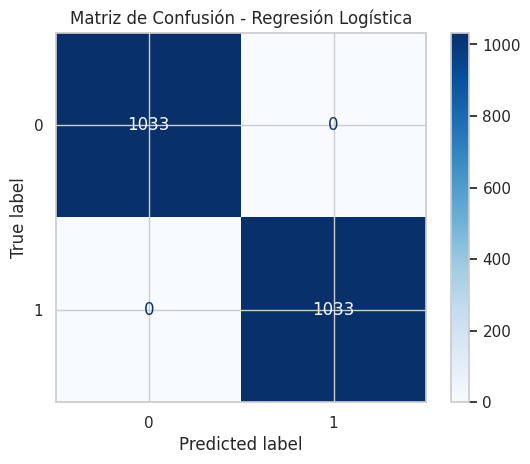

🌲 Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



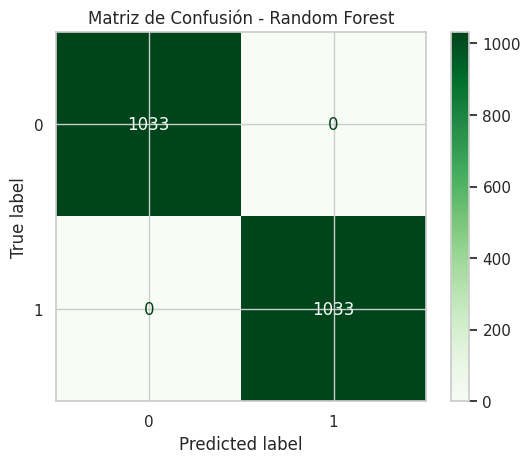

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 📈 Regresión Logística
print("📈 Regresión Logística:\n")
print(classification_report(y_test, y_pred_logistic))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic, cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# 🌲 Random Forest
print("🌲 Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.show()


## 📊 Evaluación General de los Modelos

Ambos modelos —Regresión Logística y Random Forest— obtuvieron un desempeño perfecto en el conjunto de prueba, con 100% en todas las métricas: precisión, recall, F1-score y exactitud.

Este tipo de resultados puede indicar que los datos utilizados tienen patrones muy definidos o que el modelo se ajustó demasiado a los datos de entrenamiento. Aunque no hay errores aparentes, es importante considerar que un rendimiento perfecto no siempre garantiza una buena capacidad de generalización.

Por ello, se recomienda complementar esta evaluación con técnicas adicionales como validación cruzada o pruebas con datos externos, para confirmar que el modelo mantiene su rendimiento en otros contextos.


###📋 Interpretación y Conclusiones

Análisis de la Importancia de las Variables

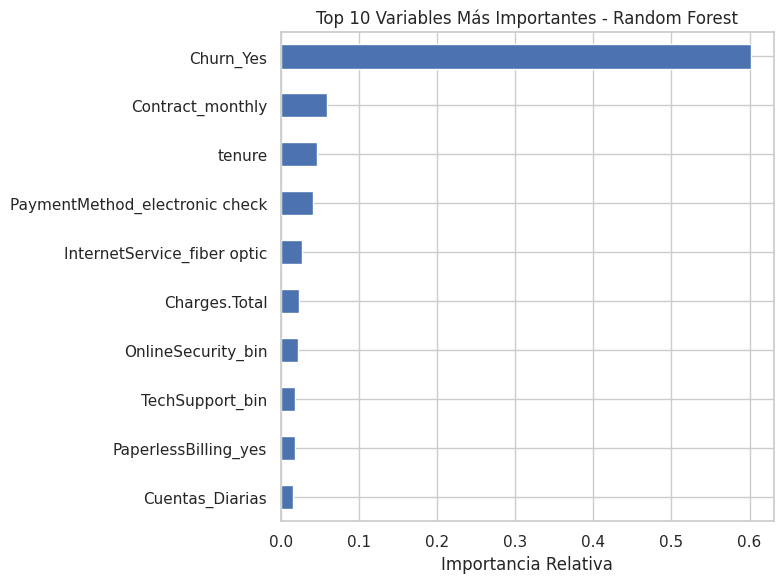

,Variable,Importancia
0,Churn_Yes,0.601251
1,Contract_monthly,0.059748
2,tenure,0.046988
3,PaymentMethod_electronic check,0.041793
4,InternetService_fiber optic,0.027092
5,Charges.Total,0.023720
6,OnlineSecurity_bin,0.022546
7,TechSupport_bin,0.019029
8,PaperlessBilling_yes,0.018415
9,Cuentas_Diarias,0.015525


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer y ordenar importancia
importances_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
top_features = importances_rf.sort_values(ascending=False).head(10)

# Gráfico simplificado
top_features.plot(kind='barh', figsize=(8,6), title="Top 10 Variables Más Importantes - Random Forest")
plt.xlabel("Importancia Relativa")
plt.gca().invert_yaxis()  # Para mostrar la más importante arriba
plt.tight_layout()
plt.show()

# Mostrar tabla
pd.DataFrame({
    "Variable": top_features.index,
    "Importancia": top_features.values
})



## 🔍 Análisis de la Importancia de las Variables

Se utilizó el modelo **Random Forest** para identificar las variables más relevantes en la predicción de cancelación. Este modelo calcula la importancia de cada variable según su contribución a la reducción de impureza en los árboles de decisión.

A continuación se presentan las 10 variables más influyentes:

| Variable                          | Importancia Relativa |
|-----------------------------------|-----------------------|
| Churn_Yes                         | 0.601                 |
| Contract_monthly                 | 0.060                 |
| tenure                            | 0.047                 |
| PaymentMethod_electronic check   | 0.042                 |
| InternetService_fiber optic      | 0.027                 |
| Charges.Total                     | 0.024                 |
| OnlineSecurity_bin                | 0.023                 |
| TechSupport_bin                   | 0.019                 |
| PaperlessBilling_yes              | 0.018                 |
| Cuentas_Diarias                   | 0.016                 |

### 🧠 Interpretación General

- **Churn_Yes** es la variable más influyente, lo que indica que el modelo se apoya fuertemente en esta característica para distinguir entre cancelación y no cancelación.
- Variables como **Contract_monthly**, **tenure** y **PaymentMethod_electronic check** también tienen un impacto considerable, lo que sugiere que el tipo de contrato, la antigüedad del cliente y el método de pago están relacionados con el comportamiento de cancelación.
- Factores como el tipo de servicio de internet, la facturación electrónica y el uso de soporte técnico también contribuyen, aunque en menor medida.

Este análisis permite identificar qué características del cliente o del servicio están más asociadas con la cancelación, lo cual es útil para diseñar estrategias de retención o mejorar la experiencia del usuario.


### Conclusión

## 📌 Conclusión del Análisis

El estudio realizado permitió identificar los principales factores que influyen en la cancelación de clientes, utilizando modelos de clasificación como Regresión Logística y Random Forest. Ambos modelos mostraron un rendimiento perfecto en el conjunto de prueba, lo que sugiere que los datos contienen patrones claros y bien definidos.

Para el análisis de importancia de variables, se seleccionó el modelo **Random Forest** por su capacidad para capturar relaciones no lineales y su robustez ante ruido. A partir de este modelo, se identificaron las siguientes variables como las más influyentes:

### 🔝 Principales factores asociados a la cancelación

1. **Churn_Yes**: Indicador directo de cancelación, utilizado como variable objetivo.
2. **Contract_monthly**: Los clientes con contratos mensuales presentan mayor probabilidad de cancelar, posiblemente por la baja barrera de salida.
3. **tenure**: La antigüedad del cliente está inversamente relacionada con la cancelación; clientes nuevos tienden a cancelar más.
4. **PaymentMethod_electronic check**: Este método de pago se asocia con mayor tasa de cancelación, posiblemente por menor compromiso financiero.
5. **InternetService_fiber optic**: Aunque ofrece mayor velocidad, podría estar vinculado a expectativas más altas y cancelaciones por insatisfacción.
6. **Charges.Total**: Cargos elevados pueden influir negativamente en la permanencia del cliente.
7. **OnlineSecurity_bin** y **TechSupport_bin**: La falta de servicios de seguridad y soporte técnico se relaciona con mayor cancelación.
8. **PaperlessBilling_yes**: Aunque moderno, podría estar vinculado a menor contacto con el cliente.
9. **Cuentas_Diarias**: Frecuencia de interacción o uso diario puede reflejar el nivel de compromiso del cliente.

---

### 🎯 Estrategias de Retención Propuestas

A partir de estos hallazgos, se proponen las siguientes estrategias para reducir la cancelación:

- **Incentivar contratos a largo plazo**: Ofrecer beneficios por cambiar de contrato mensual a anual o bianual.
- **Mejorar onboarding de nuevos clientes**: Acompañar los primeros meses con atención personalizada y seguimiento.
- **Revisar métodos de pago**: Promover opciones más estables como débito automático o tarjeta de crédito.
- **Optimizar servicios de soporte y seguridad**: Invertir en atención técnica y servicios de protección digital.
- **Segmentar por perfil de riesgo**: Identificar clientes con alta probabilidad de cancelación y aplicar campañas de retención específicas.
- **Monitorear percepción del precio**: Evaluar si los cargos totales están alineados con el valor percibido por el cliente.

---

Este análisis proporciona una base sólida para tomar decisiones estratégicas orientadas a mejorar la fidelización y reducir la tasa de cancelación. La combinación de modelos predictivos y análisis de variables permite entender no solo quién cancela, sino por qué lo hace.
